## Requirements and Example CSV

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

example_csv = "https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-age/congress-terms.csv"

Congress Data from [fivethirtyeight Congress Age data](https://github.com/fivethirtyeight/data/tree/master/congress-age)
 

## Ingest

In [19]:
general_df = pd.read_csv(example_csv)
assert general_df is not None
assert general_df.shape == (18635, 13)
general_df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3


Last five rows:

In [20]:
general_df.tail()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age
18630,113,senate,B000243,Max,S.,Baucus,NaN,1937-12-10,MT,D,Yes,2013-01-03,75.1
18631,113,senate,C001099,William,NaN,Cowan,NaN,1965-04-03,MA,D,No,2013-01-03,47.8
18632,113,senate,C001100,Jeffrey,Scott,Chiesa,NaN,1961-06-21,NJ,R,No,2013-01-03,51.5
18633,113,senate,K000148,John,Forbes,Kerry,NaN,1939-12-10,MA,D,Yes,2013-01-03,73.1
18634,113,senate,L000123,Frank,R.,Lautenberg,NaN,1920-01-22,NJ,D,Yes,2013-01-03,93.0


Column names:

In [21]:
general_df.columns

Index(['congress', 'chamber', 'bioguide', 'firstname', 'middlename',
       'lastname', 'suffix', 'birthday', 'state', 'party', 'incumbent',
       'termstart', 'age'],
      dtype='object')

Shape of dataset:

In [22]:
general_df.shape

(18635, 13)

## Inital EDA

In [23]:
general_df.describe()

,congress,age
count,18635.000000,18635.000000
mean,96.445989,53.313732
std,9.823429,10.678469
min,80.000000,25.000000
25%,88.000000,45.400000
50%,96.000000,53.000000
75%,105.000000,60.550000
max,113.000000,98.100000


Histogram of age of distbution of congress members:

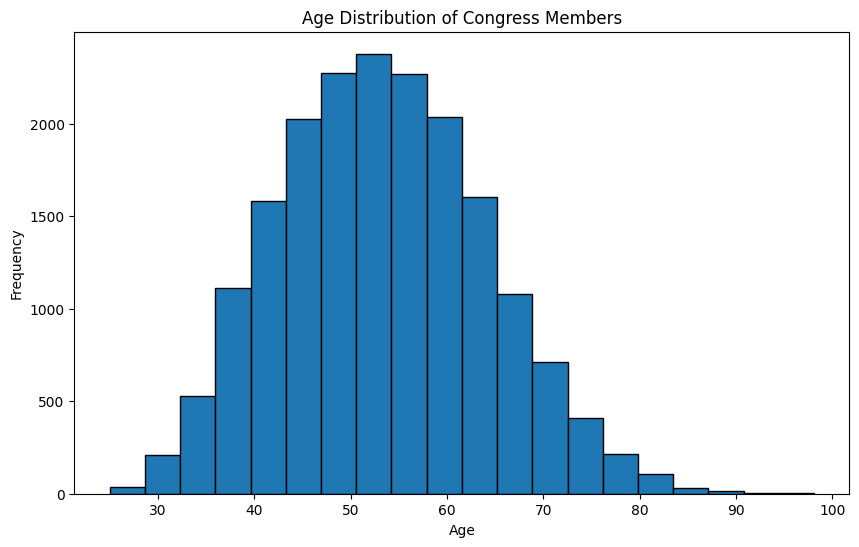

In [24]:
"""generate a histogram of age of distbution of congress members"""
plt.figure(figsize=(10, 6))
plt.hist(general_df["age"], bins=20, edgecolor="black")
plt.title("Age Distribution of Congress Members")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Bar graph of state distrubution of congress members:

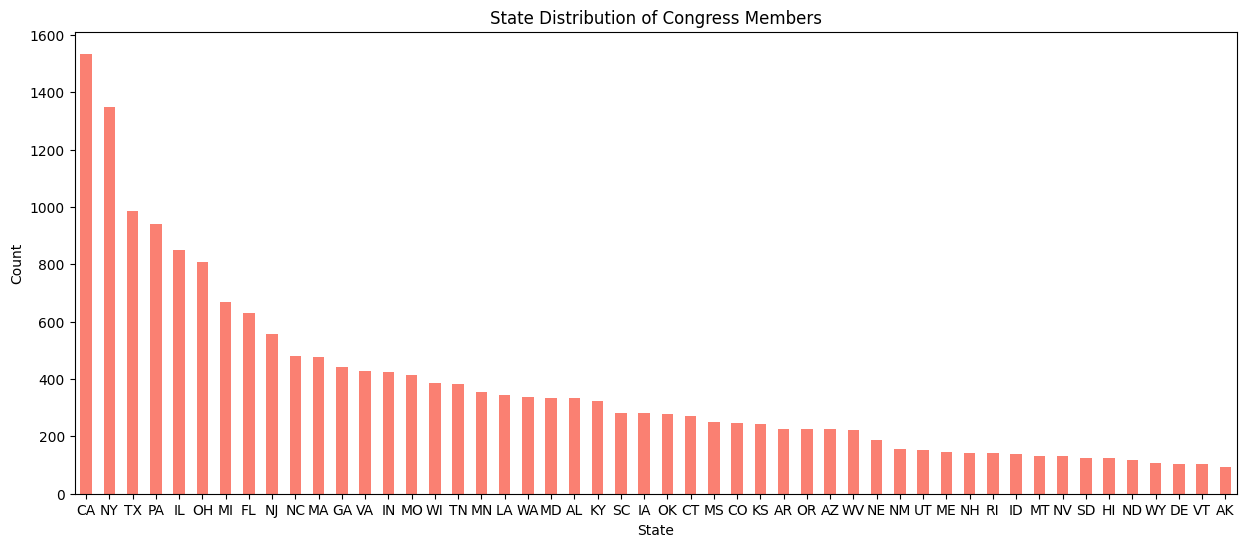

In [25]:
"""generate a bar graph of state distrubution of congress members"""
gender_counts = general_df["state"].value_counts()
plt.figure(figsize=(15, 6))
gender_counts.plot(kind="bar", color="salmon")
plt.title("State Distribution of Congress Members")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## Date based EDA

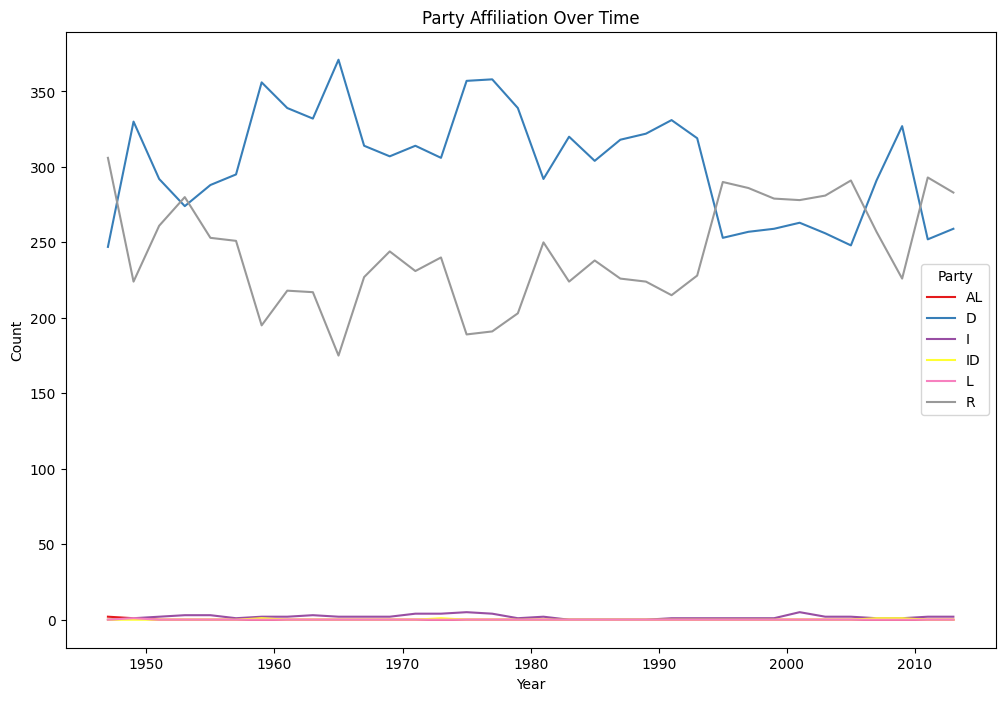

In [26]:
"""generate a line chart of pary affiliation over time"""
general_df["start_date"] = pd.to_datetime(general_df["termstart"])
general_df["year"] = general_df["start_date"].dt.year
party_counts = general_df.groupby(["year", "party"]).size().unstack(fill_value=0)
party_counts.plot(kind="line", figsize=(12, 8), colormap="Set1")
plt.title("Party Affiliation Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Party")
plt.show()

## Metric based EDA

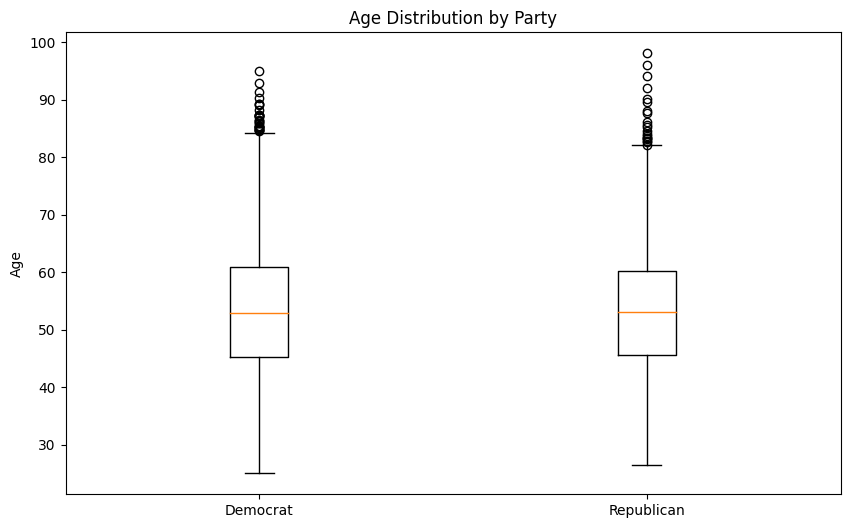

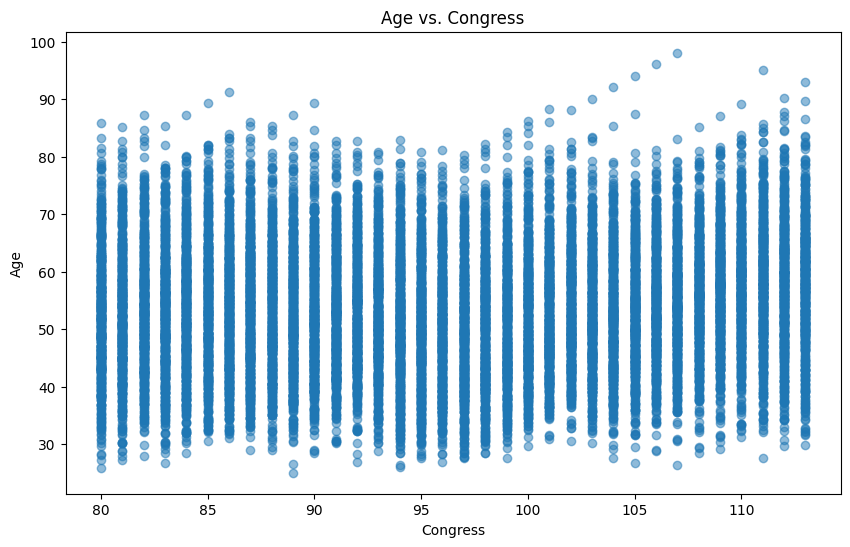

In [27]:
# Grouping by 'state' and finding the mean of age
age_by_state = general_df.groupby("state")["age"].mean()

# Grouping by 'party' and finding the maximum age
max_age_by_party = general_df.groupby("party")["age"].max()

count_by_congress_chamber = general_df.groupby(["congress", "chamber"]).size()

# Visualizations
# Box plot of ages by party
plt.figure(figsize=(10, 6))
plt.boxplot(
    [
        general_df[general_df["party"] == "D"]["age"],
        general_df[general_df["party"] == "R"]["age"],
    ],
    labels=["Democrat", "Republican"],
)
plt.title("Age Distribution by Party")
plt.ylabel("Age")
plt.show()

# Scatter plot of age vs. congress
plt.figure(figsize=(10, 6))
plt.scatter(general_df["congress"], general_df["age"], alpha=0.5)
plt.title("Age vs. Congress")
plt.xlabel("Congress")
plt.ylabel("Age")
plt.show()

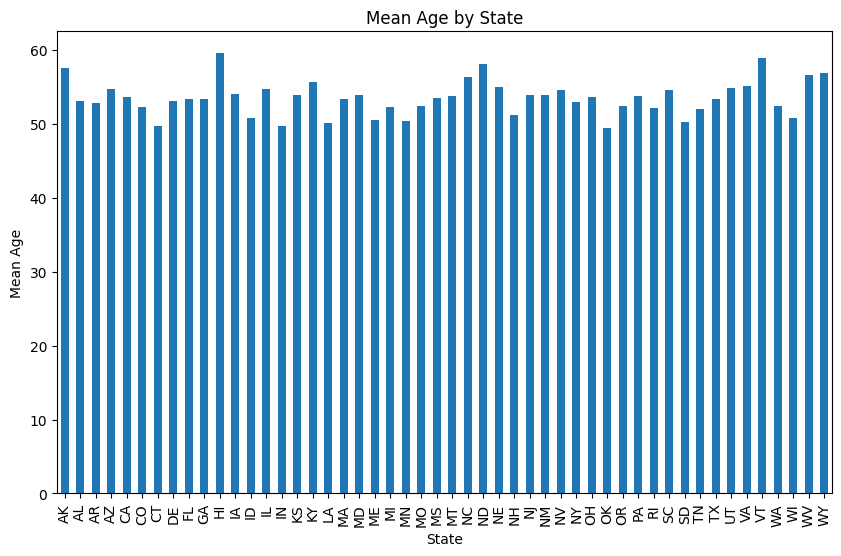

In [28]:
# Grouping by 'state' and finding the mean of 'age'
age_by_state = general_df.groupby("state")["age"].mean()

# Plotting a bar chart
age_by_state.plot(kind="bar", figsize=(10, 6))
plt.title("Mean Age by State")
plt.xlabel("State")
plt.ylabel("Mean Age")
plt.show()

## Merging datasets for EDA 

Convert full name to merge later with dataset

In [29]:
general_df["full_name"] = general_df["firstname"] + " " + general_df["lastname"]
general_df.head()

,congress,chamber,bioguide,firstname,middlename,lastname,suffix,birthday,state,party,incumbent,termstart,age,start_date,year,full_name
0,80,house,M000112,Joseph,Jefferson,Mansfield,NaN,1861-02-09,TX,D,Yes,1947-01-03,85.9,1947-01-03,1947,Joseph Mansfield
1,80,house,D000448,Robert,Lee,Doughton,NaN,1863-11-07,NC,D,Yes,1947-01-03,83.2,1947-01-03,1947,Robert Doughton
2,80,house,S000001,Adolph,Joachim,Sabath,NaN,1866-04-04,IL,D,Yes,1947-01-03,80.7,1947-01-03,1947,Adolph Sabath
3,80,house,E000023,Charles,Aubrey,Eaton,NaN,1868-03-29,NJ,R,Yes,1947-01-03,78.8,1947-01-03,1947,Charles Eaton
4,80,house,L000296,William,NaN,Lewis,NaN,1868-09-22,KY,R,No,1947-01-03,78.3,1947-01-03,1947,William Lewis


In [30]:
general_df2 = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/congress-demographics/data_aging_congress.csv"
)
general_df2.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation
0,82,1951-01-03,House,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost
1,80,1947-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,1,1,14106,38.620123,Greatest
2,81,1949-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,2,2,14837,40.621492,Greatest
3,82,1951-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,3,3,15567,42.620123,Greatest
4,83,1953-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,4,4,16298,44.621492,Greatest


In [31]:
# Extracting only the name from 'bioname'
general_df2["name"] = general_df2["bioname"].apply(lambda x: x.split(", ")[1])
general_df2.head()

,congress,start_date,chamber,state_abbrev,party_code,bioname,bioguide_id,birthday,cmltv_cong,cmltv_chamber,age_days,age_years,generation,name
0,82,1951-01-03,House,ND,200,"AANDAHL, Fred George",A000001,1897-04-09,1,1,19626,53.733060,Lost,Fred George
1,80,1947-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,1,1,14106,38.620123,Greatest,Watkins Moorman
2,81,1949-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,2,2,14837,40.621492,Greatest,Watkins Moorman
3,82,1951-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,3,3,15567,42.620123,Greatest,Watkins Moorman
4,83,1953-01-03,House,VA,100,"ABBITT, Watkins Moorman",A000002,1908-05-21,4,4,16298,44.621492,Greatest,Watkins Moorman


In [32]:
merged_df = pd.merge(
    general_df,
    general_df2,
    left_on=["full_name", "termstart"],
    right_on=["name", "start_date"],
    how="inner",
)

# Print the head of the merged DataFrame
print(merged_df.head())

   congress_x chamber_x bioguide firstname middlename  lastname suffix  \
0          80     house  R000522   Charles     Hinton   Russell    NaN   
1          80     house  W000517      John       Bell  Williams    NaN   
2          80    senate  W000518      John      James  Williams    NaN   
3          80    senate  W000581    George    Allison    Wilson    NaN   
4          81     house  P000309      John        NaN  Phillips    NaN   

   birthday_x state party  ... party_code                  bioname  \
0  1903-12-27    NV     R  ...        200  CLASON, Charles Russell   
1  1918-12-04    MS     D  ...        200    GWYNNE, John Williams   
2  1904-05-17    DE     R  ...        200    GWYNNE, John Williams   
3  1884-04-01    IA     R  ...        200    MALONE, George Wilson   
4  1887-09-11    CA     R  ...        200    SAYLOR, John Phillips   

   bioguide_id  birthday_y  cmltv_cong cmltv_chamber  age_days  age_years  \
0      C000473  1890-09-03           6             6     

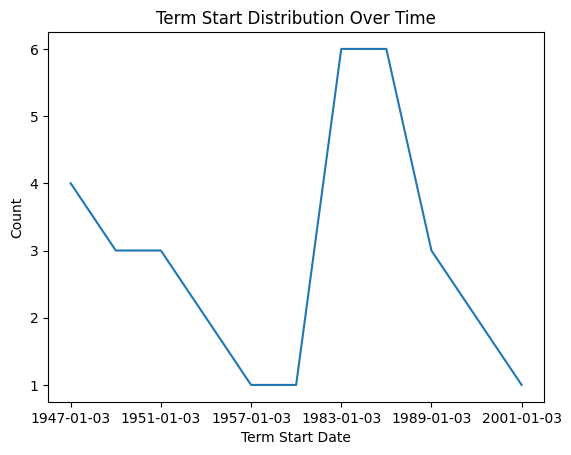

In [33]:
merged_df["termstart"].value_counts().sort_index().plot(kind="line")
plt.xlabel("Term Start Date")
plt.ylabel("Count")
plt.title("Term Start Distribution Over Time")
plt.show()

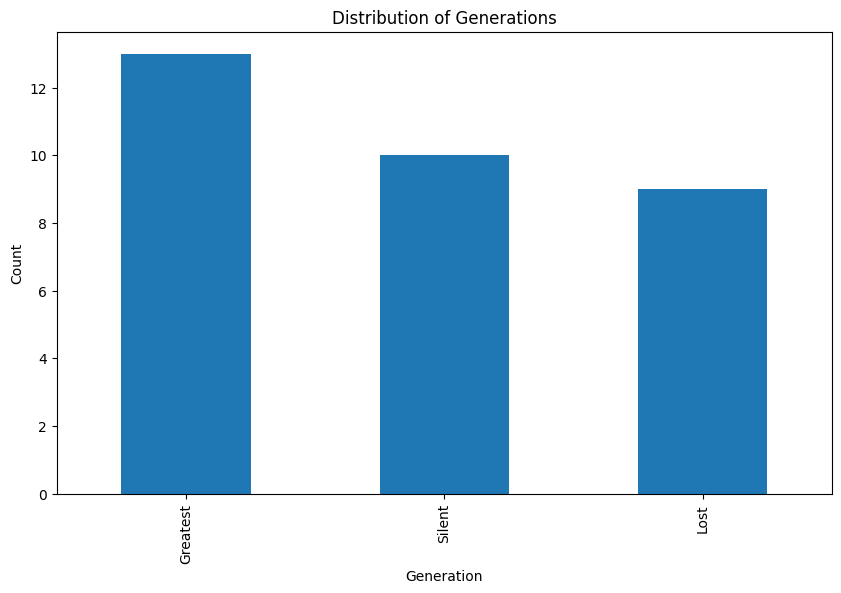

In [34]:
generation_counts = merged_df["generation"].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
generation_counts.plot(kind="bar")
plt.title("Distribution of Generations")
plt.xlabel("Generation")
plt.ylabel("Count")
plt.show()